In [ ]:
#!unzip "drive/My Drive/ML Projects/Flower Classification/archive.zip" -d"drive/My Drive/ML Projects/Flower Classification"

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
from tensorflow.keras import layers , Model

In [ ]:
base_path ="drive/My Drive/ML Projects/Flower Classification/flowers"

categories =['daisy','dandelion','rose','sunflower','tulip']
fnames=[]
for category in categories:
  flower_folder = os.path.join(base_path,category)
  file_names = os.listdir(flower_folder)
  full_path = [os.path.join(flower_folder,file_name) for file_name in file_names]
  fnames.append(full_path)

In [ ]:
print("Length of each category", [len(f) for f in fnames])

Length of each category [769, 1052, 784, 734, 984]


In [ ]:
fnames

[['drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34696729796_190b1dfdf1_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34076975155_1faeedec90_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34524074031_e42b9b1acd_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34720703615_bdf1335d8b_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/33843240613_0b736f9896_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34661399476_9ea7e2fd53_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34518374242_310e7abd54_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34693373736_9ce6d9e1c3_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34585331601_837dbe5254_n.jpg',
  'drive/My Drive/ML Projects/Flower Classification/flowers/daisy/34546994701_a000b283f1_n.jpg',
  'drive/My Drive/ML Projects/

In [ ]:
from matplotlib.pyplot import imread

images =[]

for names in fnames:
  one_category_images = [imread(name) for name in names if (imread(name)) is not None]

  images.append(one_category_images)

In [ ]:
print('number of images for each category:', [len(f) for f in images])

number of images for each category: [769, 1052, 784, 734, 984]


In [ ]:
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

125,134 is the min shape for daisy
98,134 is the min shape for dandelion
80,150 is the min shape for rose
134,152 is the min shape for sunflower
134,134 is the min shape for tulip


In [ ]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

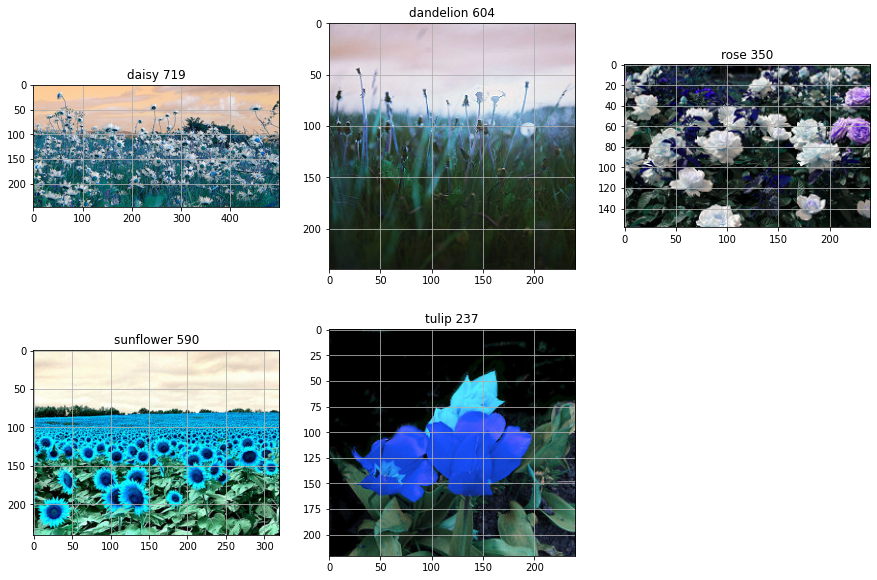

In [ ]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(2,3,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

In [ ]:
img_width, img_height = 256, 256

img = images[3][659]
print(img.shape)

resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
print(resized_img2.shape)

(240, 320, 3)
(256, 256, 3)


In [ ]:
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [ ]:
resized_images

[[array([[[ 40,  39,  47],
          [ 38,  37,  45],
          [ 36,  35,  43],
          ...,
          [162, 187, 243],
          [162, 187, 243],
          [161, 186, 242]],
  
         [[ 40,  39,  47],
          [ 38,  37,  45],
          [ 37,  36,  44],
          ...,
          [162, 187, 243],
          [162, 187, 243],
          [161, 186, 242]],
  
         [[ 39,  38,  46],
          [ 38,  37,  45],
          [ 37,  36,  44],
          ...,
          [162, 187, 243],
          [162, 187, 243],
          [161, 186, 242]],
  
         ...,
  
         [[ 46,  42,  41],
          [ 44,  38,  55],
          [ 59,  66,  10],
          ...,
          [199, 185, 185],
          [199, 185, 185],
          [198, 184, 184]],
  
         [[ 47,  41,  47],
          [ 49,  42,  59],
          [ 57,  63,  15],
          ...,
          [199, 185, 185],
          [199, 185, 185],
          [199, 185, 185]],
  
         [[ 49,  41,  55],
          [ 54,  48,  63],
          [ 57,  63,  19

In [ ]:
from sklearn.model_selection import train_test_split
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [ ]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(5):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[615, 841, 627, 587, 787]
sum of train images: 3457
[154, 211, 157, 147, 197]
sum of val_images: 866


In [ ]:
from  tensorflow.python.keras.utils import np_utils
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [ ]:

print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = np_utils.to_categorical(train_categories, len(categories))
val_labels = np_utils.to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)


Before converting
train data: (3457, 256, 256, 3)
train labels: (3457,)

After converting
train data: (3457, 256, 256, 3)
train labels: (3457, 5)


In [ ]:
seed = 100
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [ ]:
train_data = train_data[:3400]
train_labels = train_labels[:3400]
val_data = val_data[:860]
val_labels = val_labels[:860]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (3400, 256, 256, 3)
shape of train labels: (3400, 5)
shape of val data: (860, 256, 256, 3)
shape of val labels: (860, 5)


In [ ]:
def create_model_from_scratch():
  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=train_data.shape[1:],activation='relu', name='conv_1'),
          tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv_2'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_1'),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',name='conv_3'),
          tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_4'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_2'),
          tf.keras.layers.Dropout(0.25),

           tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu',name='conv_5'),
          tf.keras.layers.Conv2D(128,(3,3),activation='relu',name='conv_6'),
          tf.keras.layers.MaxPooling2D((2,2),name='maxpool_3'),
          tf.keras.layers.Dropout(0.25),


          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512,activation='relu',name='dense_1'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(128,activation='relu',name='dense_2'),
          tf.keras.layers.Dense(len(categories), activation='softmax',name='output')])
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)

  return model

In [ ]:

model_scratch = create_model_from_scratch()
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 254, 254, 32)      9248      
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 127, 127, 64)      18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 125, 125, 64)      36928     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 62, 62, 64)        0

In [ ]:

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50

In [ ]:
def create_model_from_VGG19():

  model= VGG19(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))
  for layer in model.layers:
    layer.trainable = False
  #last_layer = pre_trained_model.get_layer('mixed7')
  #print('last layer output shape: ', last_layer.output_shape)
  #last_output = last_layer.output

  x = model.output
  x = Flatten()(x)
  x = Dense(1024, activation="relu")(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation="relu")(x)
  predictions = Dense(len(categories), activation="softmax")(x)

  final_model = Model(inputs=model.input, outputs= predictions)
    
  final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
  return final_model

In [ ]:
def create_model_from_Resnet50():

    model = Sequential()

    model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(2048, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(len(categories), activation='softmax'))

    model.layers[0].trainable = False
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
    
    return model

In [ ]:
model_VGG19 = create_model_from_VGG19()

model_VGG19.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_______________________________________________________

In [ ]:
model_Resnet50 = create_model_from_Resnet50()

model_Resnet50.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_______________________________________________________

In [ ]:
# Parameters
batch_size = 32
epochs1 = 50
epochs2 = 10
epochs3 = 30

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

In [ ]:
model_scratch_info = model_scratch.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs1, 
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator, 
    verbose=2
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
107/106 - 57s - loss: 1.6251 - acc: 0.2347 - val_loss: 1.5999 - val_acc: 0.2442
Epoch 2/50
107/106 - 56s - loss: 1.5993 - acc: 0.2438 - val_loss: 1.5991 - val_acc: 0.2442
Epoch 3/50
107/106 - 56s - loss: 1.5994 - acc: 0.2412 - val_loss: 1.5990 - val_acc: 0.2442
Epoch 4/50
107/106 - 56s - loss: 1.5992 - acc: 0.2438 - val_loss: 1.5991 - val_acc: 0.2442
Epoch 5/50
107/106 - 56s - loss: 1.5995 - acc: 0.2438 - val_loss: 1.5989 - val_acc: 0.2442
Epoch 6/50
107/106 - 56s - loss: 1.5993 - acc: 0.2438 - val_loss: 1.5990 - val_acc: 0.2442
Epoch 7/50
107/106 - 56s - loss: 1.5994 - acc: 0.2438 - val_loss: 1.5989 - val_acc: 0.2442
Epoch 8/50
107/106 - 56s - loss: 1.5993 - acc: 0.2438 - val_loss: 1.5989 - val_acc: 0.2442
Epoch 9/50
107/106 - 56s - loss: 1.5996 - acc: 0.2438 - val_loss: 1.5993 - val_acc: 0.2442
Epoch 10/50
107/106 - 57s - loss: 1.5991 - acc: 0.2415 - val_loss: 1.5990 - val_acc: 0.2442
Epoch 11/50
1

In [ ]:


model_VGG19_info = model_VGG19.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs2, 
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator,
    verbose=2
)


Epoch 1/10
107/106 - 63s - loss: 2.3590 - acc: 0.3809 - val_loss: 0.9910 - val_acc: 0.6500
Epoch 2/10
107/106 - 62s - loss: 1.2904 - acc: 0.4597 - val_loss: 1.0707 - val_acc: 0.5977
Epoch 3/10
107/106 - 62s - loss: 1.3021 - acc: 0.4494 - val_loss: 0.9112 - val_acc: 0.6663
Epoch 4/10
107/106 - 62s - loss: 1.2683 - acc: 0.4588 - val_loss: 0.9525 - val_acc: 0.6407
Epoch 5/10
107/106 - 63s - loss: 1.2137 - acc: 0.4803 - val_loss: 0.8474 - val_acc: 0.6721
Epoch 6/10
107/106 - 63s - loss: 1.2392 - acc: 0.4744 - val_loss: 0.8632 - val_acc: 0.6977
Epoch 7/10
107/106 - 63s - loss: 1.1792 - acc: 0.5029 - val_loss: 0.8113 - val_acc: 0.7128
Epoch 8/10
107/106 - 63s - loss: 1.1937 - acc: 0.4926 - val_loss: 0.8194 - val_acc: 0.7233
Epoch 9/10
107/106 - 64s - loss: 1.1685 - acc: 0.5000 - val_loss: 0.8646 - val_acc: 0.6744
Epoch 10/10
107/106 - 63s - loss: 1.1862 - acc: 0.5003 - val_loss: 0.7513 - val_acc: 0.7337


In [ ]:

model_ResNet50_info = model_Resnet50.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data)/batch_size,   # -> 106 # images 3392 = steps * batch_size = 106 * 32 
    epochs=epochs3, 
    validation_steps=len(val_data)/batch_size, # -> 26 # images 832 = steps * batch_size = 26 * 32
    validation_data=val_generator, 
    verbose=2
)

Epoch 1/30
107/106 - 60s - loss: 1.8899 - acc: 0.3574 - val_loss: 1.6497 - val_acc: 0.2267
Epoch 2/30
107/106 - 59s - loss: 1.4656 - acc: 0.4088 - val_loss: 1.4831 - val_acc: 0.3547
Epoch 3/30
107/106 - 59s - loss: 1.4346 - acc: 0.4376 - val_loss: 1.4211 - val_acc: 0.3709
Epoch 4/30
107/106 - 59s - loss: 1.4228 - acc: 0.4229 - val_loss: 1.3372 - val_acc: 0.4279
Epoch 5/30
107/106 - 59s - loss: 1.3560 - acc: 0.4574 - val_loss: 1.3802 - val_acc: 0.4558
Epoch 6/30
107/106 - 59s - loss: 1.3585 - acc: 0.4582 - val_loss: 1.3312 - val_acc: 0.4733
Epoch 7/30
107/106 - 59s - loss: 1.3545 - acc: 0.4582 - val_loss: 1.2156 - val_acc: 0.5477
Epoch 8/30
107/106 - 59s - loss: 1.3376 - acc: 0.4632 - val_loss: 1.4039 - val_acc: 0.5314
Epoch 9/30
107/106 - 59s - loss: 1.3271 - acc: 0.4803 - val_loss: 1.3698 - val_acc: 0.4895
Epoch 10/30
107/106 - 59s - loss: 1.3121 - acc: 0.4656 - val_loss: 1.4160 - val_acc: 0.5012
Epoch 11/30
107/106 - 59s - loss: 1.3124 - acc: 0.4809 - val_loss: 1.2825 - val_acc: 0.55

In [ ]:

def return_name(label_arr):
  idx = np.where(label_arr == 1)
  return idx[0][0]

In [ ]:

# Plots for training and testing process: loss and accuracy

def plot_model_history(model_name, history, epochs):
  
  print(model_name)
  plt.figure(figsize=(15, 5))
  
  # summarize history for accuracy
  plt.subplot(1, 2 ,1)
  plt.plot(np.arange(0, len(history['acc'])), history['acc'], 'r')
  plt.plot(np.arange(1, len(history['val_acc'])+1), history['val_acc'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Accuracy vs. Validation Accuracy')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'validation'], loc='best')
  
  plt.subplot(1, 2, 2)
  plt.plot(np.arange(1, len(history['loss'])+1), history['loss'], 'r')
  plt.plot(np.arange(1, len(history['val_loss'])+1), history['val_loss'], 'g')
  plt.xticks(np.arange(0, epochs+1, epochs/10))
  plt.title('Training Loss vs. Validation Loss')
  plt.xlabel('Num of Epochs')
  plt.ylabel('Loss')
  plt.legend(['train', 'validation'], loc='best')
  
  
  plt.show()

model_scratch


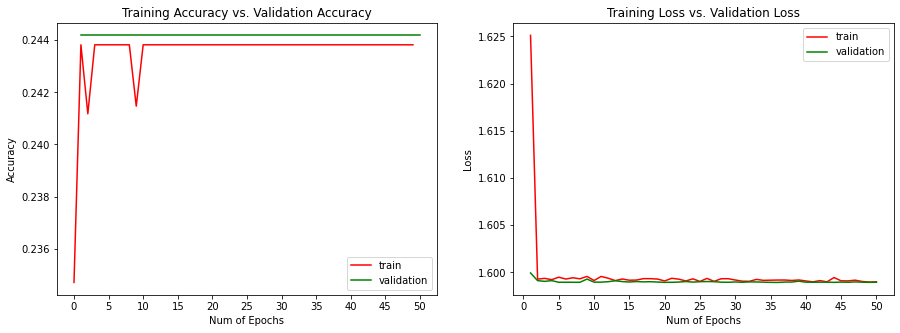

model_VGG19


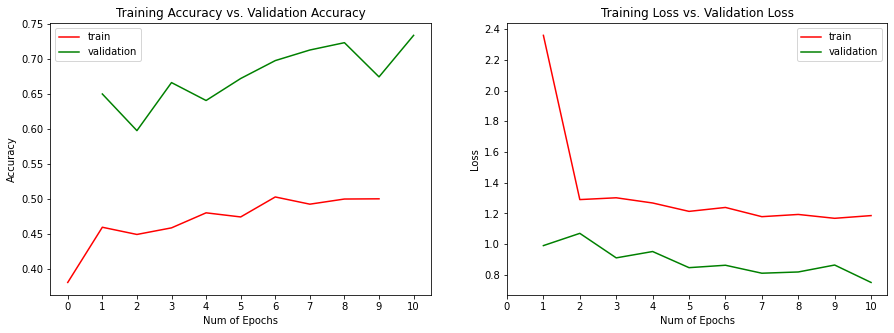

model_ResNet50


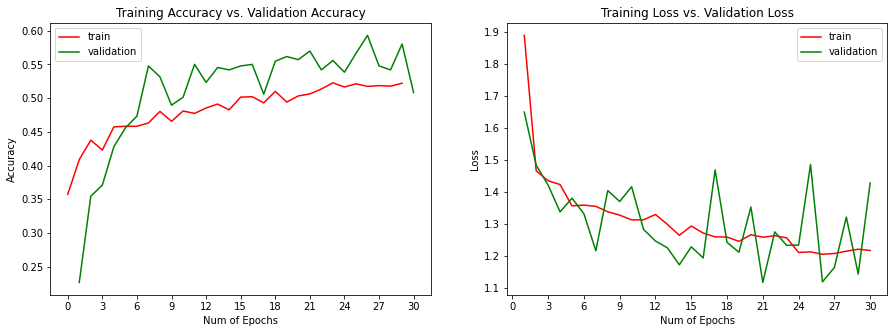

In [ ]:
plot_model_history('model_scratch', model_scratch_info.history, epochs1)
plot_model_history('model_VGG19', model_VGG19_info.history, epochs2)
plot_model_history('model_ResNet50', model_ResNet50_info.history, epochs3)

In [ ]:

def predict_one_image(img, model):
  img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
  img = np.reshape(img, (1, img_width, img_height, 3))
  img = img/255.
  pred = model.predict(img)
  class_num = np.argmax(pred)
  return class_num, np.max(pred)

rose 70%


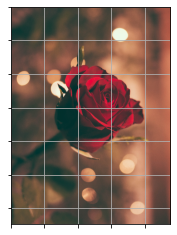

In [ ]:
# idx = 120
# pred, probability = predict_one_image(images[4][idx], model_ResNet50)

test_img = cv2.imread('drive/My Drive/Sample/jamie-street-C6CVXJMXwqs-unsplash.jpg')
pred, probability = predict_one_image(test_img, model_Resnet50)
print('%s %d%%' % (categories[pred], round(probability, 2) * 100))
_, ax = plt.subplots(1)
plt.imshow(cvtRGB(test_img))
# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.grid('off')
plt.show()